In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
scores = pd.read_json('../../ake-benchmarking/scores.json')

In [59]:
scores.columns

Index(['F@10', 'F@10_present', 'F@5', 'F@5_present', 'MAP', 'MAP_present',
       'P@10', 'P@10_present', 'P@5', 'P@5_present', 'R@10', 'R@10_present',
       'R@5', 'R@5_present', 'dataset', 'date', 'model', 'ref', 'stem'],
      dtype='object')

In [40]:
melted_scores = scores.melt(id_vars=['dataset', 'date', 'model', 'ref', 'stem'],
                            value_vars=[
                                'F@10', 'F@10_present', 'F@5', 'F@5_present', 'MAP', 'MAP_present', 'P@10',
                                'P@10_present', 'P@5', 'P@5_present', 'R@10', 'R@10_present', 'R@5', 'R@5_present'])

In [48]:
tmp = melted_scores[melted_scores['stem']==True]\
    [melted_scores['model'].isin(['CopyRNN', 'CopyRNN_News', 'TfIdf', 'MultipartiteRank'])]\
    [melted_scores['dataset'].isin(['KP20k', 'NYTime', 'KDD', 'NUS'])]\
    [melted_scores['variable'].isin(['F@5_present', 'F@5', 'F@5_absent'])]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


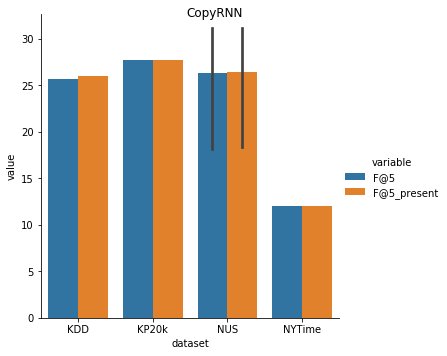

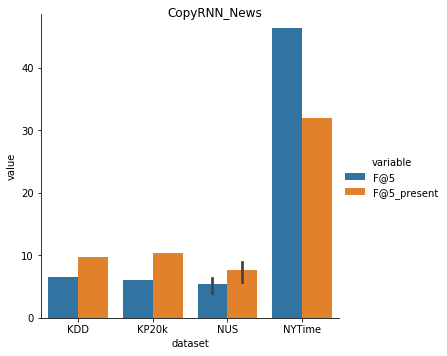

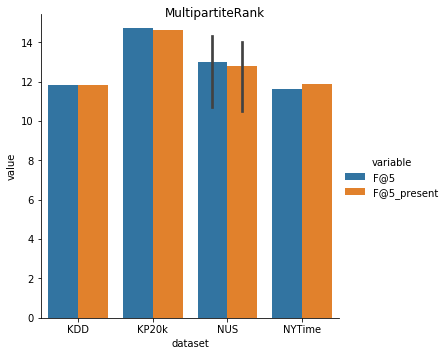

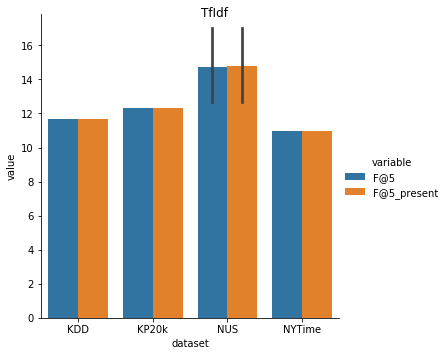

In [58]:
for i, subdf in tmp.groupby('model'):
    a = sns.catplot(x='dataset', y='value', hue='variable', kind="bar", data=subdf)
    plt.gcf().suptitle(i)

Absent keyphrases (ie. that do not appear litterally in the input text) always yield lesser results than present one.
To see whether this is linked to the fact that models 'overfit' on generating present keyphrases (which are easier to generate thanks to the copy mechanism), we train two models.
- The first model (CopyRNN_pres) is trained to generate only the present keyphrases.
    The keyphrases not appearing in the document are filtered out from the training data
- The second (CopyRNN_abs) is trained to generate only the absent keyphrases.
    The keyphrases appearing in the document are filtered out from the training data

In [70]:
! head -n 36 abs_prs_split.py | tail -n 22

def compute_pres_abs_kp(line, lower=True, stem=False):
    content = line['title'] + ' . ' + line['abstract']
    content = content.lower() if lower else content
    content = tsj(content) if stem else content
    pres, abse = [], []
    keyword = line['keyword']

    for i, kp in enumerate(keyword):
        p_acc, a_acc = [], []
        for v in kp:
            og_v = v
            v = v.lower() if lower else v
            v = tsj(v) if stem else v
            if v in content:
                p_acc.append(og_v)
            else:
                a_acc.append(og_v)
        if p_acc:
            pres.append(p_acc)
        if a_acc:
            abse.append(a_acc)
    return pres, abse
